# Telemarketing Campaign Prediction
### Data Description
The dataset used is the traditional dataset gives the information about bank marketing compaign.In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc.

The dataset contains both numerical and categorical attributes. Total number of attributes are Seventeen. 

### Objective: 
The task is to predict for customers who were contacted during the current campaign, whether they will buy car insurance or not.
To create a classification filter (Using Logistics Regression & KNN Classification Algorithm) to determine Churn from Telecom dataset. Compare the performance of the filters.
#### Dataset: 
Source(https://www.kaggle.com/gauravduttakiit/bank-telemarketing-campaign-case



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Reading the dataset
df=pd.read_excel('bank_marketing.xls')

In [4]:
#Checking the data
df.head()

,customerid,age,salary,balance,marital,job,edu,default,housing,loan,contact,day,month,duration,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,management,tertiary,no,yes,no,unknown,5,"may, 2017",261.0,-1,0,unknown,no
1,2,44.0,60000,29,single,technician,secondary,no,yes,no,unknown,5,"may, 2017",151.0,-1,0,unknown,no
2,3,33.0,120000,2,married,entrepreneur,secondary,no,yes,yes,unknown,5,"may, 2017",76.0,-1,0,unknown,no
3,4,47.0,20000,1506,married,blue-collar,unknown,no,yes,no,unknown,5,"may, 2017",92.0,-1,0,unknown,no
4,5,33.0,0,1,single,unknown,unknown,no,no,no,unknown,5,"may, 2017",198.0,-1,0,unknown,no


In [5]:
#Checking df structure.Like type of columns and how many columns are there.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  16383 non-null  int64  
 1   age         16373 non-null  float64
 2   salary      16383 non-null  int64  
 3   balance     16383 non-null  int64  
 4   marital     16383 non-null  object 
 5   job         16383 non-null  object 
 6   edu         16383 non-null  object 
 7   default     16383 non-null  object 
 8   housing     16383 non-null  object 
 9   loan        16383 non-null  object 
 10  contact     16383 non-null  object 
 11  day         16383 non-null  int64  
 12  month       16360 non-null  object 
 13  duration    16383 non-null  float64
 14  pdays       16383 non-null  int64  
 15  previous    16383 non-null  int64  
 16  poutcome    16383 non-null  object 
 17  response    16373 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 2.2+ MB


In [6]:
#Checking number of rows and column
df.shape

(16383, 18)

In [7]:
#Describing numerical columns of df
df.describe()

,customerid,age,salary,balance,day,duration,pdays,previous
count,16383.000000,16373.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.0,16383.0
mean,8192.000000,40.548891,53386.559238,1074.714826,15.102301,222.297317,-1.0,0.0
std,4729.509065,9.518323,31647.424076,2557.572970,7.869652,252.438247,0.0,0.0
min,1.000000,20.000000,0.000000,-8019.000000,1.000000,0.000000,-1.0,0.0
25%,4096.500000,33.000000,20000.000000,25.000000,8.000000,68.000000,-1.0,0.0
50%,8192.000000,39.000000,55000.000000,332.000000,15.000000,156.000000,-1.0,0.0
75%,12287.500000,48.000000,70000.000000,1126.000000,21.000000,285.000000,-1.0,0.0
max,16383.000000,61.000000,120000.000000,58932.000000,30.000000,3881.000000,-1.0,0.0


In [8]:
#Checking categorical features and their unique values
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

marital
['married' 'single' 'divorced']
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
edu
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may, 2017' nan 'jun, 2017' 'jul, 2017']
poutcome
['unknown']
response
['no' 'yes' nan]


##### Features
 0.   customerid  |  int64    |                                   
 1.   age         |  float64  |  age in years                                   
 2.   salary      |  int64    |                                                 
 3.   balance     |  int64    |                                                 
 4.   marital     |  object   |  marital status('married' 'single' 'divorced')  
 5.   job         |  object   |  Type of job('management' 'technician' 'entrepreneur' 'blue-collar' 'unknown' 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student')                                  
 6.   edu         |  object   |  Education Background('tertiary' 'secondary' 'unknown' 'primary')                              
 7.   default     |  object   |                                                 
 8.   housing     |  object   |  has housing loan?('yes','no')                                               
 9.   loan        |  object   |  has personal loan?('yes','no')                                               
 10.  contact     |  object   |  contact communication type('unknown' 'cellular' 'telephone')                                               
 11.  day         |  int64    |                                                 
 12.  month       |  object   |                                                 
 13.  duration    |  float64  |  last contact duration in seconds                                               
 14.  pdays       |  int64    |  number of days that passed by after the client was last contacted from a orevious compaign                                               
 15.  previous    |  int64    |  number of contacts performed before this compaign and for this person                                               
 16.  poutcome    |  object   |  outcome of the previous marketing compaign('unknown')
 ##### Label
 17.  response    |  object   |  has the customers taken service or not('yes','no') 

# Exploratory Data Analysis

##### In this section we are going to perform the following tasks 
- Find Unwanted columns
- Find Missing values
- Find Features with one value
- Explore the categorical features
- Find Categorical Feature Distribution
- Relationship between Categorical Feature and Labels
- Explore the numerical Feature
- Find Discrete Numerical Features
- Relationship between Discrete Numerical Feature and Labels
- Find Continous Numerical Features
- Relationship between Continous Numerical Feature and Labels
- Find Outliers in Numerical features
- Explore the correlation between numerical features
- Find Pi plot
- Check the dataset is balances or not based on target values in the classification

#### Find Unwanted Columns
- 'customerid' is unwanted columns.

In [9]:
df = df.astype({'duration': np.int64})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  16383 non-null  int64  
 1   age         16373 non-null  float64
 2   salary      16383 non-null  int64  
 3   balance     16383 non-null  int64  
 4   marital     16383 non-null  object 
 5   job         16383 non-null  object 
 6   edu         16383 non-null  object 
 7   default     16383 non-null  object 
 8   housing     16383 non-null  object 
 9   loan        16383 non-null  object 
 10  contact     16383 non-null  object 
 11  day         16383 non-null  int64  
 12  month       16360 non-null  object 
 13  duration    16383 non-null  int64  
 14  pdays       16383 non-null  int64  
 15  previous    16383 non-null  int64  
 16  poutcome    16383 non-null  object 
 17  response    16373 non-null  object 
dtypes: float64(1), int64(7), object(10)
memory usage: 2.2+ MB


#### Find Missing values

In [11]:
features_na=[features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature,np.round(df[feature].isnull().sum()))
else:
    print("No missing values found")

age 10
month 23
response 10
No missing values found


- There are 3 columns with missing values.

Next filling these missing values using mode.

#### Find Features with one value

In [12]:
for column in df.columns:
    print(column,df[column].nunique())

customerid 16383
age 42
salary 11
balance 4534
marital 3
job 12
edu 4
default 2
housing 2
loan 2
contact 3
day 30
month 3
duration 1195
pdays 1
previous 1
poutcome 1
response 2


- There are 3 columns with one value. These columns will have no effect on target variable so i will drop these columns from dataframe.

#### Explore Categorical features

In [13]:
categorical_features=[feature for feature in df.columns if((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['marital',
 'job',
 'edu',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'response']

In [14]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is marital and number of categories are 3
The feature is job and number of categories are 12
The feature is edu and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 4
The feature is poutcome and number of categories are 1
The feature is response and number of categories are 3


#### Find the categorical feature distribution

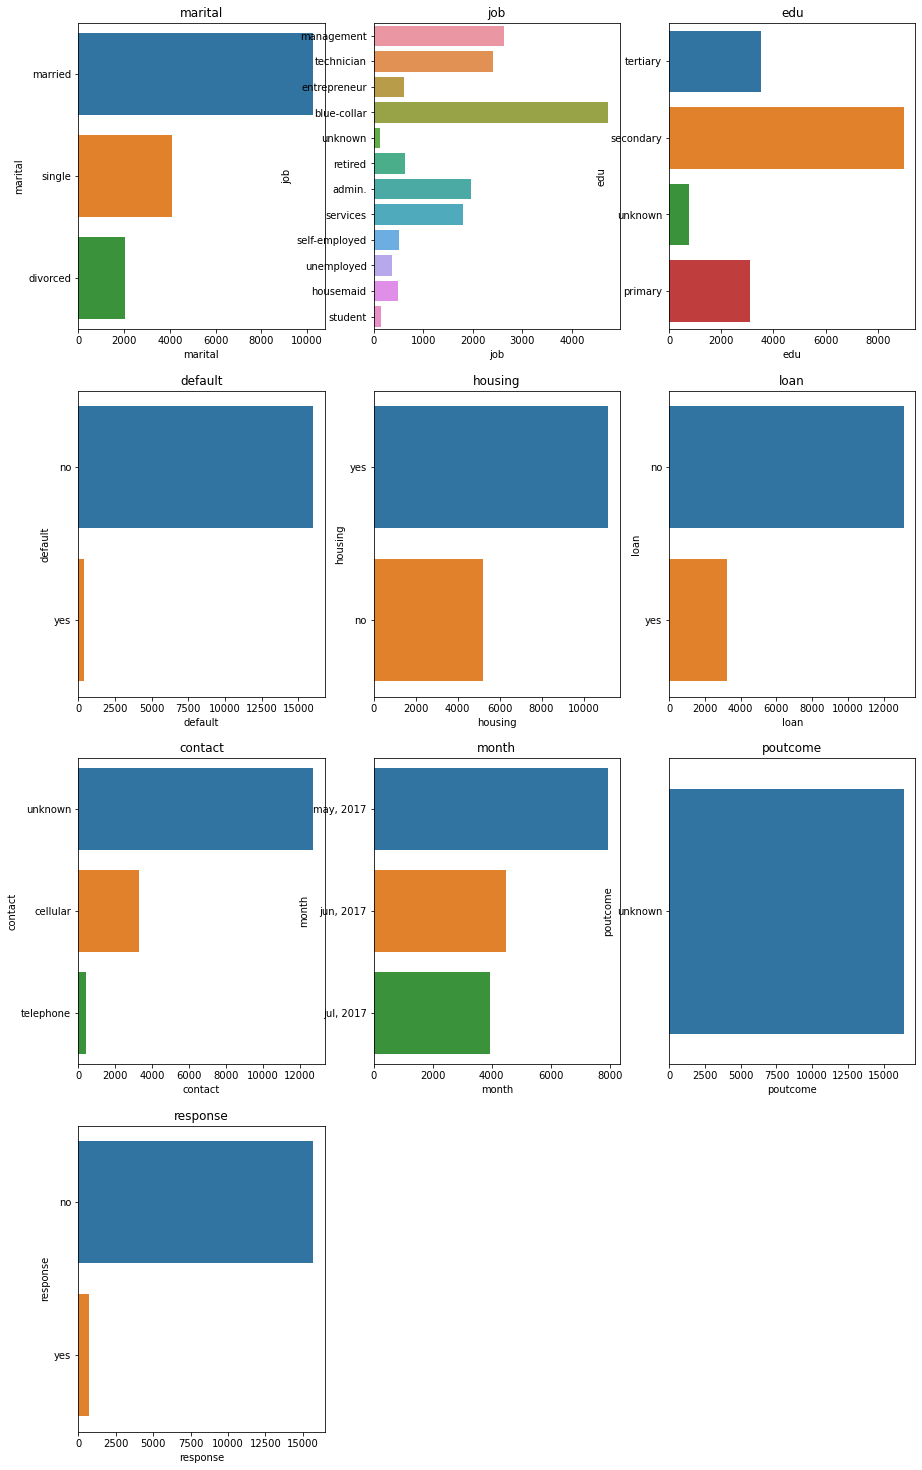

In [15]:
plt.figure(figsize=(15,80),facecolor='white')
plotnumber=1
for categorical_feature in categorical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

- Married customers are majority in te dataset.
- Maximum customers have secondary education.
- Most of the customers have taken housing loan.
- Contact details of most of the customers is unknown.
- Mostly customers are contacted in may month 2017.


#### Relationship between categorical features and label

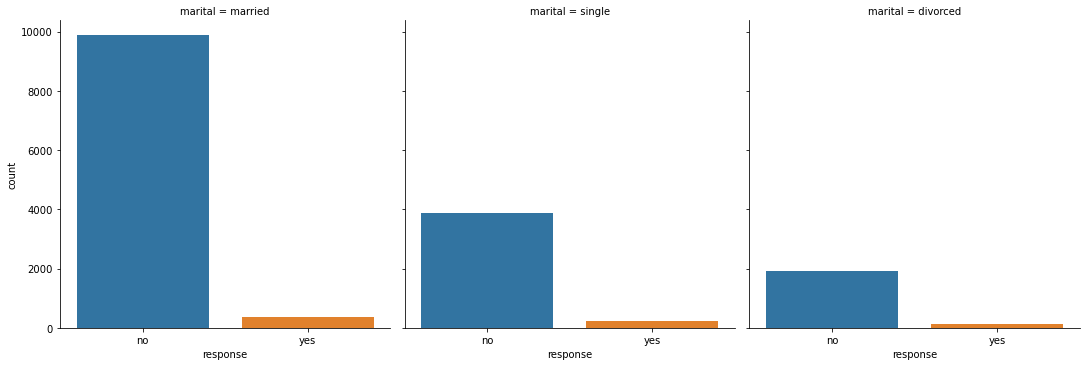

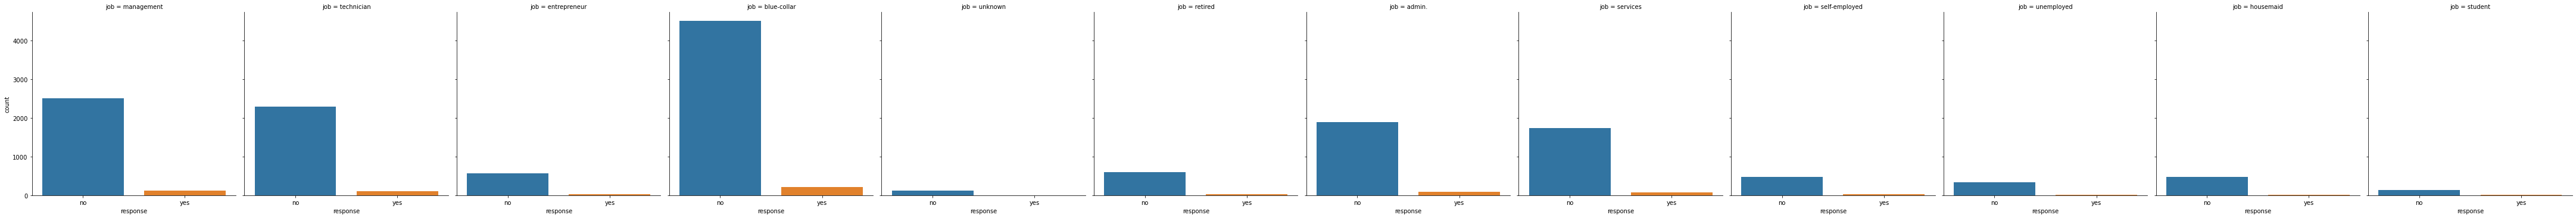

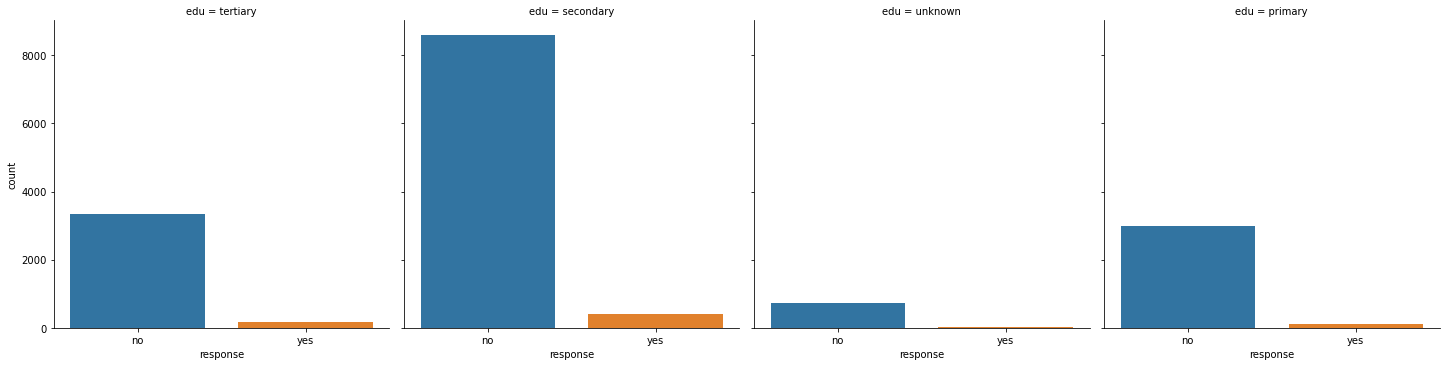

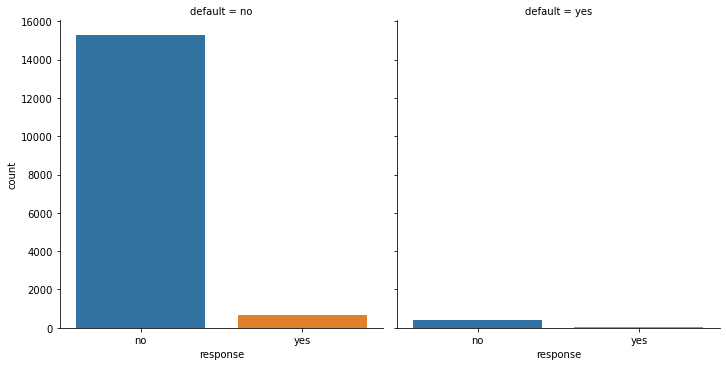

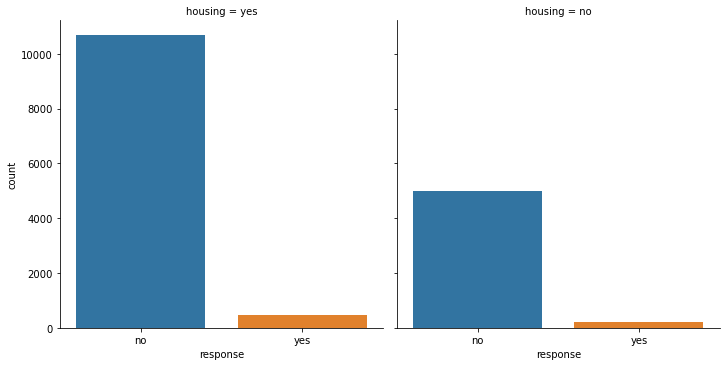

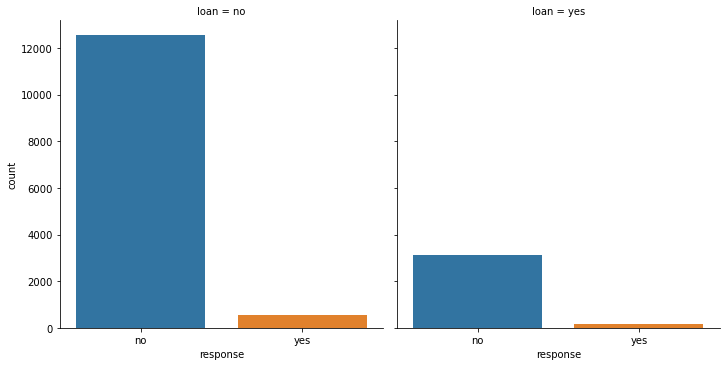

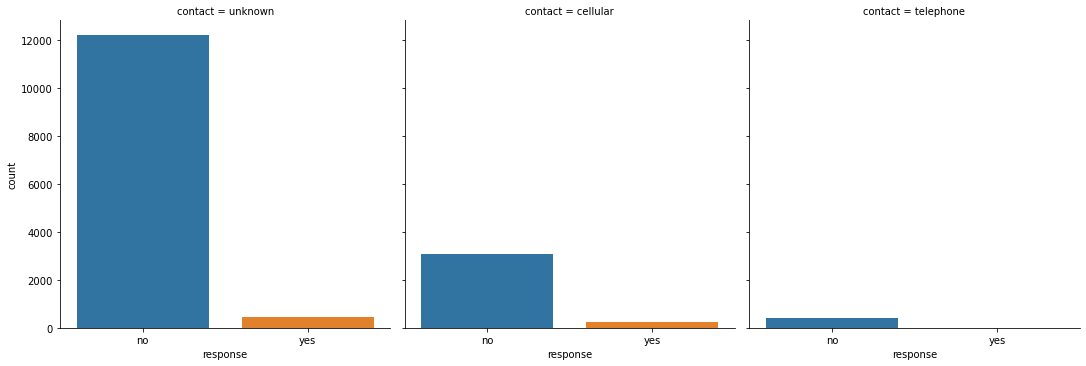

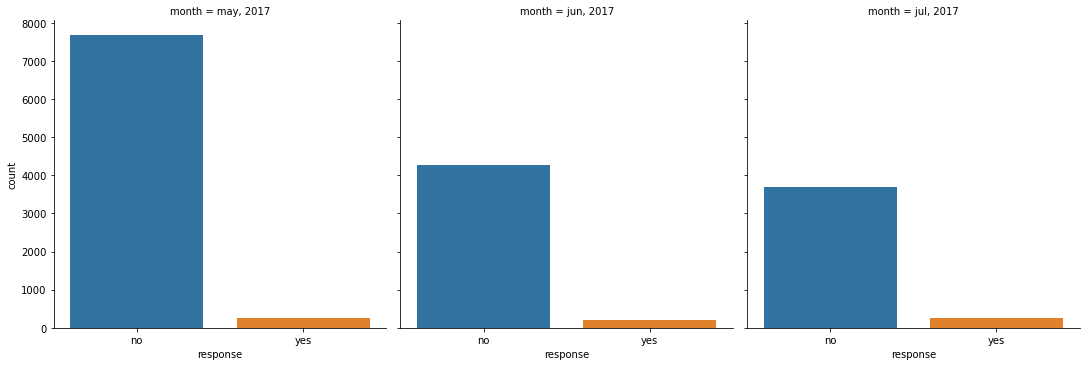

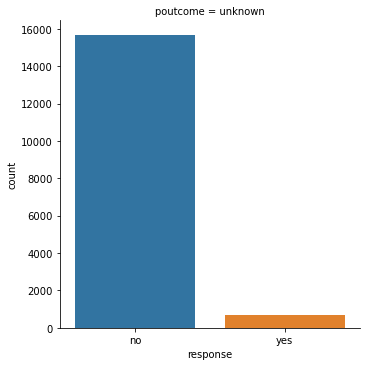

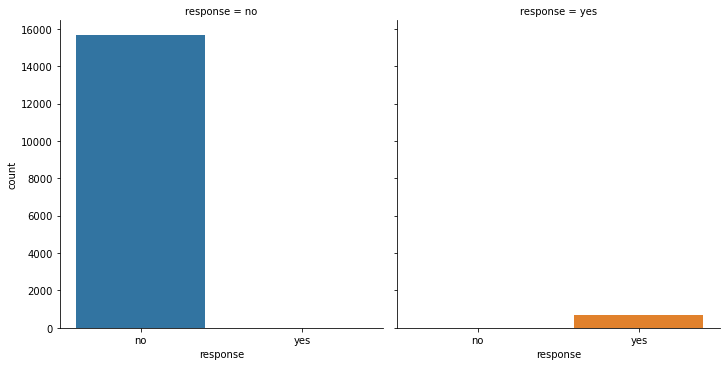

In [16]:
for categorical_feature in categorical_features:
    sns.catplot(x='response',col=categorical_feature,kind='count',data=df)
plt.show()

In [17]:
for categorical_feature in categorical_features:
    print(df.groupby(['response',categorical_feature]).size())

response  marital 
no        divorced    1907
          married     9886
          single      3872
yes       divorced     127
          married      355
          single       226
dtype: int64
response  job          
no        admin.           1887
          blue-collar      4511
          entrepreneur      574
          housemaid         480
          management       2502
          retired           604
          self-employed     481
          services         1734
          student           132
          technician       2300
          unemployed        342
          unknown           118
yes       admin.             82
          blue-collar       214
          entrepreneur       30
          housemaid          15
          management        116
          retired            24
          self-employed      24
          services           72
          student             7
          technician        105
          unemployed         18
          unknown             1
dtype: int64
r

- Married customers has shown more interest.
- 'blue-collar' job type customers have shown maximum interest but majority of   them said 'No'.

#### Explore the numerical features

In [18]:
# List of numerical features
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes !='O') & (feature not in ['response']))]
print('Number of numerical variables: ',len(numerical_features))
# Visualise the numerical features
df[numerical_features].head()

Number of numerical variables:  8


,customerid,age,salary,balance,day,duration,pdays,previous
0,1,58.0,100000,2143,5,261,-1,0
1,2,44.0,60000,29,5,151,-1,0
2,3,33.0,120000,2,5,76,-1,0
3,4,47.0,20000,1506,5,92,-1,0
4,5,33.0,0,1,5,198,-1,0


#### Find Discrete Numerical features

In [19]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<1]
print("Discrete variables count: {}".format(len(discrete_feature)))

Discrete variables count: 0


#### Relationship between Discrete numerical features and labels
- NA

#### Find Continous Numerical Features

In [20]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['response']]
print("Continuous Feature count: {}".format(len(continuous_features)))
continuous_features

Continuous Feature count: 8


['customerid',
 'age',
 'salary',
 'balance',
 'day',
 'duration',
 'pdays',
 'previous']

- There are 8 Continous Numerical Features

#### Distribution of Continous Numerical Features

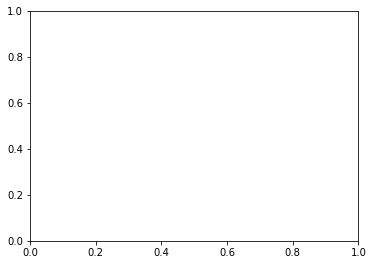

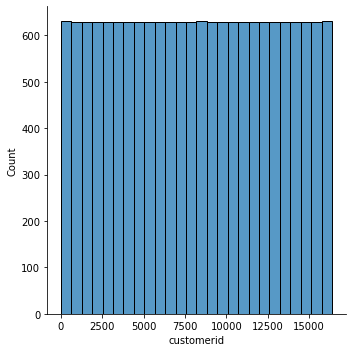

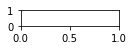

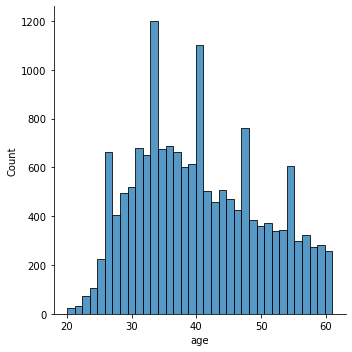

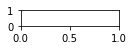

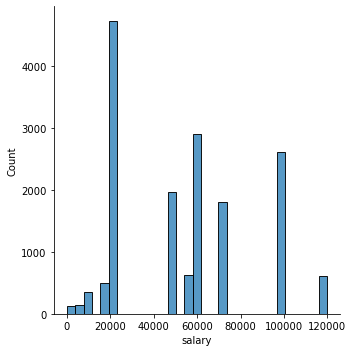

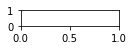

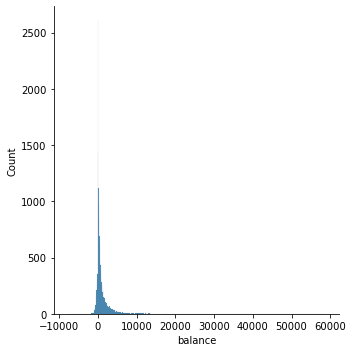

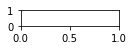

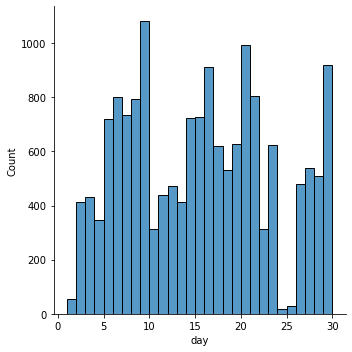

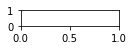

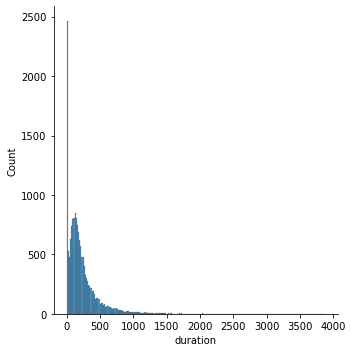

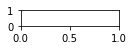

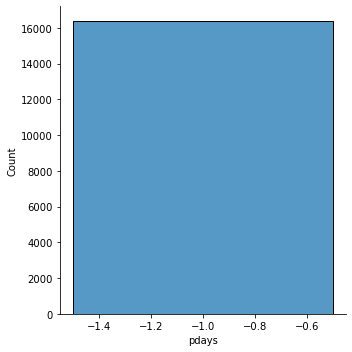

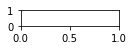

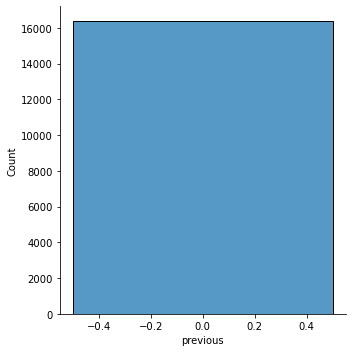

In [21]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for continuous_feature in continuous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.displot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
    plt.show()



- It looks like age is distributed better than days,balance and duration

#### Relationship between Continous Numerical Features and label

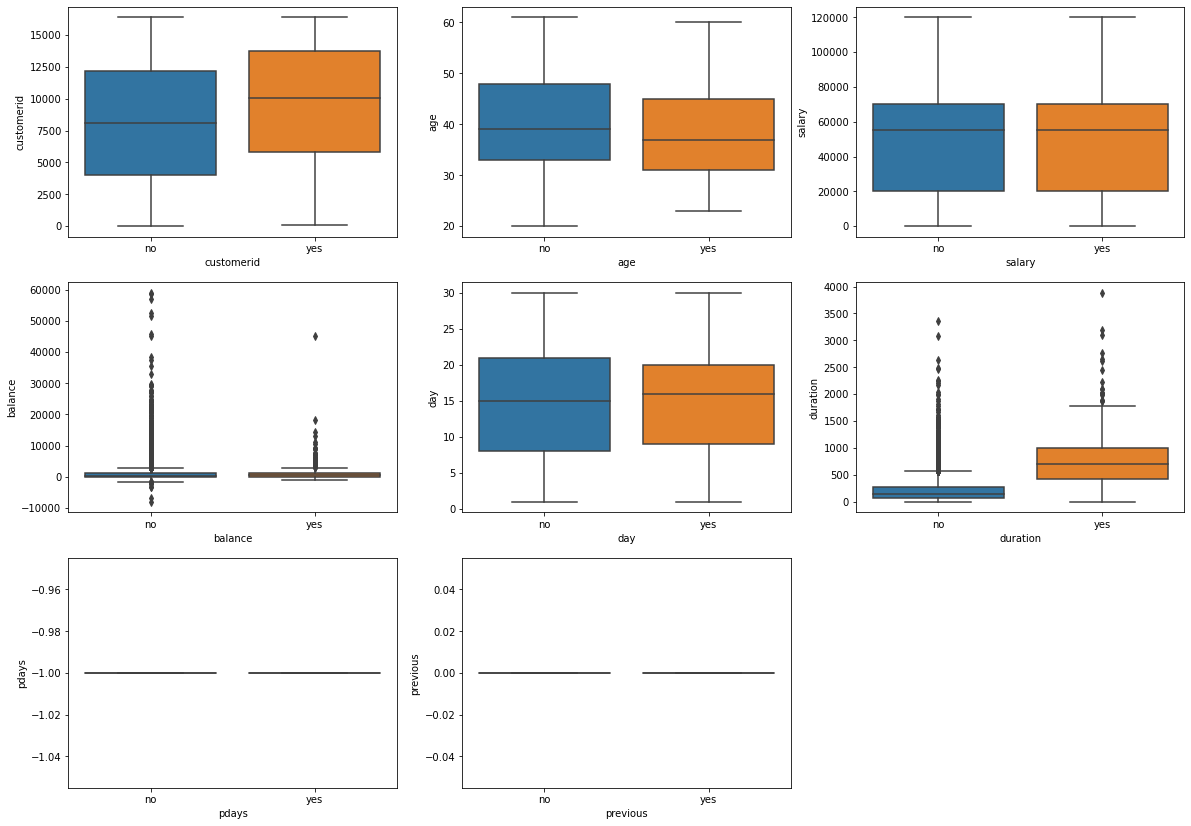

In [22]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for feature in continuous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(x='response',y=df[feature],data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()


#### Find Outliers in Numerical features

C:\Users\govin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\govin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\govin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\govin\anaconda3\lib\si

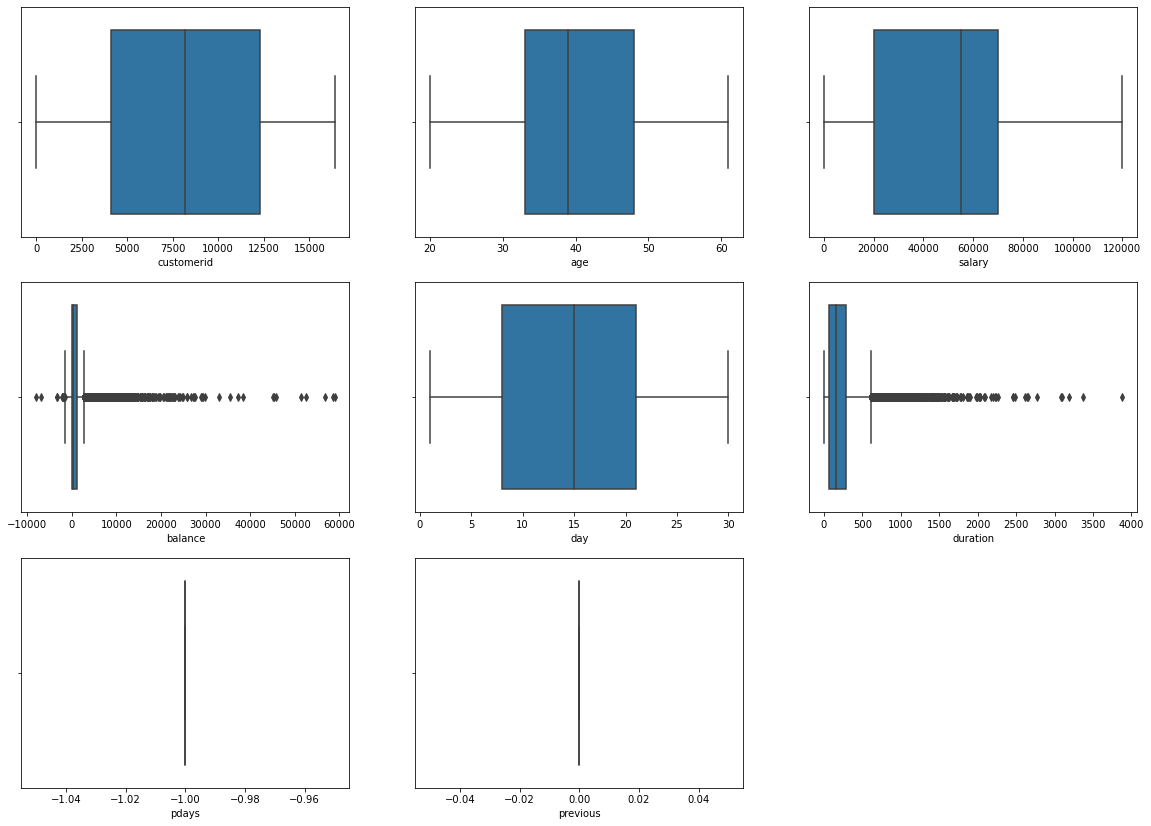

In [23]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for numerical_feature in numerical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()


- balance,day and duration has some outliers.

#### Explore the correlation between numerical features

<AxesSubplot:>

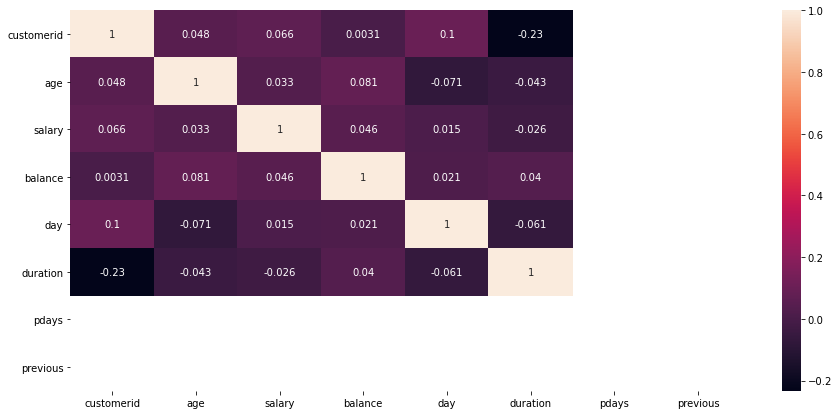

In [24]:
# Checking correlation
cor_mat=df.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

-It looks like no feature is heavily  correlated with other features

#### Check the Data Set is balanced or not based on the target values in the classification

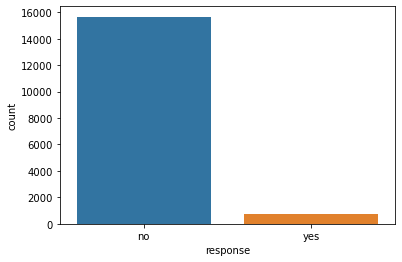

In [25]:
# Checking by countplot
sns.countplot(x='response',data=df)
plt.show()

In [26]:
# Checking by numbers.
df['response'].groupby(df['response']).count()

response
no     15665
yes      708
Name: response, dtype: int64

- The Dataset is biased toward 'no'. So it is a unbalansed dataset. In feature enginering i will try to baance the dataset.

# Feature Engineering

- Drop unwanted Features
- Handle Missing Values
- Handle Categorical Features
- Handle Feature scalling.
- Remove Outliers
- Handle unbalanced dataset

As per Exploratory Data Analysis EDA
- One unwanted fature is there
- Missing values are found
- Three feature found with one value
- Default feature doesn't play important role
- There are some outliers found
- Found that dataset is unbalanced.

In [27]:
#dropping 'customerid' from the dataframe
df.drop('customerid', axis=1, inplace=True)

In [28]:
# Filling missing values
df['age']=df['age'].fillna(df['age'].mode()[0])
df['response']=df['response'].fillna(df['response'].mode()[0])
df['month']=df['month'].fillna(df['month'].mode()[0])

In [29]:
# dropping one value features
df.drop(['pdays','previous','poutcome'], axis=1, inplace=True)

In [30]:
df.drop(['default'],axis=1,inplace=True)

In [31]:
df2=df.copy()

In [32]:
df2.head()

,age,salary,balance,marital,job,edu,housing,loan,contact,day,month,duration,response
0,58.0,100000,2143,married,management,tertiary,yes,no,unknown,5,"may, 2017",261,no
1,44.0,60000,29,single,technician,secondary,yes,no,unknown,5,"may, 2017",151,no
2,33.0,120000,2,married,entrepreneur,secondary,yes,yes,unknown,5,"may, 2017",76,no
3,47.0,20000,1506,married,blue-collar,unknown,yes,no,unknown,5,"may, 2017",92,no
4,33.0,0,1,single,unknown,unknown,no,no,unknown,5,"may, 2017",198,no


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       16383 non-null  float64
 1   salary    16383 non-null  int64  
 2   balance   16383 non-null  int64  
 3   marital   16383 non-null  object 
 4   job       16383 non-null  object 
 5   edu       16383 non-null  object 
 6   housing   16383 non-null  object 
 7   loan      16383 non-null  object 
 8   contact   16383 non-null  object 
 9   day       16383 non-null  int64  
 10  month     16383 non-null  object 
 11  duration  16383 non-null  int64  
 12  response  16383 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 1.6+ MB


In [34]:
# remove outliers in feature balance
df2.groupby(['response','balance'],sort=True)['balance'].count()
# These outliers can not be removed as balance goes high, client shows interest

response  balance
no        -8019      1
          -6847      1
          -3372      1
          -3313      1
          -2282      1
                    ..
yes        11008     1
           12956     1
           14481     1
           18188     1
           45248     1
Name: balance, Length: 5018, dtype: int64

In [35]:
# remove outliers in feature duration
df2.groupby(['response','duration'],sort=True)['duration'].count()
# These outliers can not be removed as duration goes high, client shows interest

response  duration
no        0           152
          1           482
          2           428
          3           292
          4           206
                     ... 
yes       2653          1
          2769          1
          3094          1
          3183          1
          3881          1
Name: duration, Length: 1472, dtype: int64

In [36]:
df2.groupby(['response','day'],sort=True)['day'].count()

response  day
no        1        50
          2       397
          3       416
          4       327
          5       692
          6       777
          7       709
          8       762
          9      1039
          10      291
          11      413
          12      459
          13      397
          14      698
          15      689
          16      853
          17      590
          18      491
          19      603
          20      953
          21      764
          22      298
          23      602
          24       17
          25       30
          26      460
          27      529
          28      493
          29      426
          30      450
yes       1         3
          2        15
          3        15
          4        18
          5        28
          6        26
          7        27
          8        33
          9        43
          10       22
          11       25
          12       13
          13       16
          14       25
          15      

In [37]:
df2.head()

,age,salary,balance,marital,job,edu,housing,loan,contact,day,month,duration,response
0,58.0,100000,2143,married,management,tertiary,yes,no,unknown,5,"may, 2017",261,no
1,44.0,60000,29,single,technician,secondary,yes,no,unknown,5,"may, 2017",151,no
2,33.0,120000,2,married,entrepreneur,secondary,yes,yes,unknown,5,"may, 2017",76,no
3,47.0,20000,1506,married,blue-collar,unknown,yes,no,unknown,5,"may, 2017",92,no
4,33.0,0,1,single,unknown,unknown,no,no,unknown,5,"may, 2017",198,no


In [38]:
# lets prepare categorical features

cat_colmns=['marital','job','edu','contact','month']

df_dumm1=pd.get_dummies(df2['marital'])
df_dumm2=pd.get_dummies(df2['job'])
df_dumm3=pd.get_dummies(df2['edu'])
df_dumm4=pd.get_dummies(df2['contact'])
df_dumm5=pd.get_dummies(df2['month'])

df2.drop(cat_colmns,axis=1,inplace=True)

df3=pd.concat([df2,df_dumm1,df_dumm2,df_dumm3,df_dumm4,df_dumm5], axis=1)
df3.head()

,age,salary,balance,housing,loan,day,duration,response,divorced,married,...,primary,secondary,tertiary,unknown,cellular,telephone,unknown,"jul, 2017","jun, 2017","may, 2017"
0,58.0,100000,2143,yes,no,5,261,no,0,1,...,0,0,1,0,0,0,1,0,0,1
1,44.0,60000,29,yes,no,5,151,no,0,0,...,0,1,0,0,0,0,1,0,0,1
2,33.0,120000,2,yes,yes,5,76,no,0,1,...,0,1,0,0,0,0,1,0,0,1
3,47.0,20000,1506,yes,no,5,92,no,0,1,...,0,0,0,1,0,0,1,0,0,1
4,33.0,0,1,no,no,5,198,no,0,0,...,0,0,0,1,0,0,1,0,0,1


In [39]:
# CTEGORICAL FEATURES WHICH ARE HAVING VALUES AS 'YES' OR 'NO'

bool_columns=['housing','loan','response']
for col in bool_columns:
    df3[col+'_new']=df3[col].apply(lambda x:1 if x=='yes' else 0)
    df3.drop(col,axis=1,inplace=True)

In [40]:
df3.head()

,age,salary,balance,day,duration,divorced,married,single,admin.,blue-collar,...,unknown,cellular,telephone,unknown,"jul, 2017","jun, 2017","may, 2017",housing_new,loan_new,response_new
0,58.0,100000,2143,5,261,0,1,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,44.0,60000,29,5,151,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
2,33.0,120000,2,5,76,0,1,0,0,0,...,0,0,0,1,0,0,1,1,1,0
3,47.0,20000,1506,5,92,0,1,0,0,1,...,1,0,0,1,0,0,1,1,0,0
4,33.0,0,1,5,198,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0


In [41]:
df3.columns

Index(['age', 'salary', 'balance', 'day', 'duration', 'divorced', 'married',
       'single', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown', 'primary', 'secondary',
       'tertiary', 'unknown', 'cellular', 'telephone', 'unknown', 'jul, 2017',
       'jun, 2017', 'may, 2017', 'housing_new', 'loan_new', 'response_new'],
      dtype='object')

In [42]:
X=df3.drop(['response_new'],axis=1)
y=df3['response_new']

In [43]:
len(y)

16383

In [44]:
!pip install imbalanced-learn

In [45]:
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(0.90)

C:\Users\govin\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.9 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [46]:
X_rs,y_rs=oversample.fit_resample(X.to_numpy(),y.to_numpy())

In [47]:
X.shape,y.shape,X_rs.shape,y_rs.shape

((16383, 32), (16383,), (29782, 32), (29782,))

In [48]:
X.columns

Index(['age', 'salary', 'balance', 'day', 'duration', 'divorced', 'married',
       'single', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown', 'primary', 'secondary',
       'tertiary', 'unknown', 'cellular', 'telephone', 'unknown', 'jul, 2017',
       'jun, 2017', 'may, 2017', 'housing_new', 'loan_new'],
      dtype='object')

In [49]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: response_new, dtype: int64

In [50]:

X_rsdf=pd.DataFrame(X_rs,columns=['age', 'salary', 'balance', 'day', 'duration', 'divorced', 'married',
       'single', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
       'management', 'retired', 'self-employed', 'services', 'student',
       'technician', 'unemployed', 'unknown', 'primary', 'secondary',
       'tertiary', 'unknown', 'cellular', 'telephone', 'unknown', 'jul, 2017',
       'jun, 2017', 'may, 2017', 'housing_new', 'loan_new'])

In [51]:
y_rsdf=pd.DataFrame(y_rs,columns=['response'])

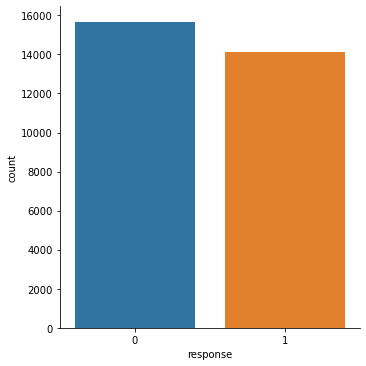

In [52]:
sns.catplot(x='response',kind='count',data=y_rsdf)

In [53]:
y_rsdf['response'].groupby(y_rsdf['response']).count()

response
0    15675
1    14107
Name: response, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X_rsdf,y_rsdf,train_size=0.7)

In [55]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((20847, 32), (8935, 32), (20847, 1), (8935, 1))

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logR=LogisticRegression(solver='lbfgs', max_iter=1000).fit(Xtrain,np.ravel(ytrain,order="c"))
logR

LogisticRegression(max_iter=1000)

In [58]:
logR.predict_proba(Xtest)

array([[0.44965937, 0.55034063],
       [0.94999537, 0.05000463],
       [0.96783257, 0.03216743],
       ...,
       [0.74916441, 0.25083559],
       [0.03109592, 0.96890408],
       [0.91511883, 0.08488117]])

In [59]:
print(logR.intercept_)

[-0.07320108]


In [60]:
print(logR.coef_)

[[-4.80854160e-02 -3.43277430e-06 -4.36542851e-05  2.92359669e-02
   6.58161946e-03  2.05323316e-01 -2.07127657e-01 -7.13959573e-02
  -1.51103437e-02 -6.00581030e-02  3.22769869e-02  7.41106209e-03
   1.78476562e-02  1.15896305e-02 -2.18579920e-02 -2.02308833e-02
   6.73510910e-03 -3.00440892e-02  5.75184858e-03 -7.51118057e-03
  -4.17641658e-02 -6.02253136e-02  1.80183849e-02  1.07707960e-02
   8.40423132e-01  3.97602174e-02 -9.53383648e-01  8.57639877e-01
  -1.52349883e-01 -7.78490293e-01 -1.78059469e-01  2.23667522e-02]]


In [61]:
pred=logR.predict(Xtest)
pred2=pd.DataFrame(pred,columns=['predicted'])
type(pred2)

pandas.core.frame.DataFrame

In [62]:
# df_res=pd.concat([ytest,pred2],axis=0)
# df_res
type(ytest)

pandas.core.frame.DataFrame

In [63]:
ytest2=ytest.reset_index()
ytest2

,index,response
0,13133,0
1,2124,0
2,5206,0
3,24138,1
4,10050,0
...,...,...
8930,561,0
8931,7101,0
8932,6901,0
8933,16556,1


In [64]:
ytest2.drop('index', axis=1, inplace=True)

In [65]:
ytest2

,response
0,0
1,0
2,0
3,1
4,0
...,...
8930,0
8931,0
8932,0
8933,1


In [66]:
df_res=pd.concat([ytest2,pred2],axis=1)
df_res

,response,predicted
0,0,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
8930,0,0
8931,0,0
8932,0,0
8933,1,1


In [67]:
ct=pd.crosstab(df_res['response'],df_res['predicted'])
ct

predicted,0,1
response,,
0,3947,754
1,824,3410


In [68]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score
from sklearn import metrics as sm 

In [69]:
accuracy=sm.accuracy_score(ytest2,pred2)
f1=f1_score(ytest2,pred2)
precision=precision_score(ytest2,pred2)
recall=recall_score(ytest2,pred2)
roc_auc=roc_auc_score(ytest2,pred2)

In [70]:
print('Accuracy is: ' ,accuracy)
print('F1 Score is: ' ,f1)
print('Precision is: ',precision)
print('Recall is: '   ,recall)
print('Roc Auc is: '  ,roc_auc)

Accuracy is:  0.8233911583659765
F1 Score is:  0.8120981185996666
Precision is:  0.818924111431316
Recall is:  0.805384978743505
Roc Auc is:  0.8224967863298465


# KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1,40)
scores={}
scores_list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain,np.ravel(ytrain,order="c"))
    _pred=knn.predict(Xtest)
    scores[k]=metrics.accuracy_score(ytest,_pred)
    scores_list.append(metrics.accuracy_score(ytest,_pred))

In [72]:
scores

{1: 0.9782876329043089,
 2: 0.9782876329043089,
 3: 0.9650811415780638,
 4: 0.9650811415780638,
 5: 0.9528819250139899,
 6: 0.9526580861779519,
 7: 0.9442641298265249,
 8: 0.9442641298265249,
 9: 0.9348628987129267,
 10: 0.9336317851147174,
 11: 0.9243424734191382,
 12: 0.9236709569110241,
 13: 0.9162842753217684,
 14: 0.9161723559037493,
 15: 0.9094571908226077,
 16: 0.906323447118075,
 17: 0.9013989927252378,
 18: 0.9010632344711808,
 19: 0.8960268606603246,
 20: 0.8953553441522104,
 21: 0.8898712926692781,
 22: 0.8872971460548406,
 23: 0.8831561275881366,
 24: 0.8839395635142697,
 25: 0.8787912702853945,
 26: 0.8784555120313374,
 27: 0.8770005595970901,
 28: 0.8744264129826524,
 29: 0.8720761052042529,
 30: 0.8710688304420817,
 31: 0.868158925573587,
 32: 0.8707330721880246,
 33: 0.8709569110240627,
 34: 0.8709569110240627,
 35: 0.8701734750979295,
 36: 0.8699496362618915,
 37: 0.8688304420817011,
 38: 0.8701734750979295,
 39: 0.868494683827644}

Text(0, 0.5, 'Testing Accuracy')

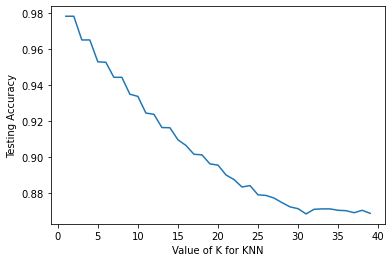

In [74]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')